# Quick demo for reading in PSI white light images

Here we read images from the rotating sequence of forward modeled white-light images computed from the final 2017 eclipse prediction simulation.

These images are Thompson scattered K-Corona total brightness (B) and polarized brightness (pB). Here we read in one of the total brightness images (B) as a `sunpy.map.Map` object.

## Notes
- The header and WCS information will be parsed for easy use in SunPy

- These images have no radial vignetting. This is the raw observable, in units of solar brightness.

- All 144 images in the series have the same timestamp in the header (time of totality, time of prediction) but the observer perspective changes in each frame by 2.5 degrees longitude. The FITS header keywords are updated accordingly.

In [2]:
# Imports
import sunpy.version
import sunpy.map
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import scipy as sci
from scipy.fft import fft2 # 2-D discrete Fourier Transform
from scipy.fft import fftshift # Shift the zero-frequency component to the center of the spectrum.
#from radialProfile.py import azimuthalAverage
import radialProfile
#importlib.reload(radialProfile)
azimuthalAverage = radialProfile.azimuthalAverage

# Print the version of sunpy originally used for this notebook
print(f'Sunpy Version: {sunpy.version.version}')

Sunpy Version: 2.0.6


<sunpy.map.mapbase.GenericMap object at 0x7ff043509f10>
SunPy Map
---------
Observatory:		 PSI-MAS Forward Model
Instrument:		 Ground
Detector:		 pB
Measurement:		 5200.0 Angstrom
Wavelength:		 5200.0 Angstrom
Observation Date:	 2017-08-21 17:18:17
Exposure Time:		 1.000000 s
Dimension:		 [1200. 1200.] pix
Coordinate System:	 helioprojective
Scale:			 [6.40220593 6.40220593] arcsec / pix
Reference Pixel:	 [599.5 599.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[1.0725494e-11, 1.0744518e-11, 1.0763545e-11, ..., 8.2728468e-12,
        8.2525800e-12, 8.2323853e-12],
       [1.0773750e-11, 1.0792937e-11, 1.0812125e-11, ..., 8.3039990e-12,
        8.2836394e-12, 8.2633535e-12],
       [1.0822209e-11, 1.0841564e-11, 1.0860917e-11, ..., 8.3353159e-12,
        8.3148644e-12, 8.2944875e-12],
       ...,
       [6.4997426e-12, 6.5181471e-12, 6.5366293e-12, ..., 8.4710051e-12,
        8.4561585e-12, 8.4413058e-12],
       [6.4770298e-12, 6.4953611e-12, 6.5137700e-12, ..., 8.4352343e-12,
        8.4203547e-12, 8.4054699e-12],
       [6.4544316e-12, 6.4726900e-12, 6.4910252e-12, ..., 8.3996950e-12,
        8.3847825e-12, 8.3698656e-12]], dtype=float32)
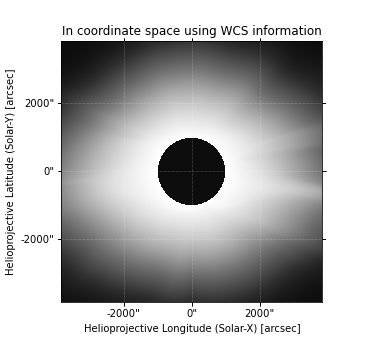
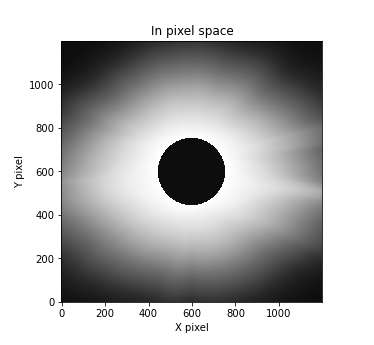
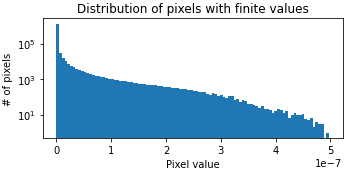

In [3]:
# Where is the data located?
fits_dir = '/Users/crura/Desktop/Research/PredictiveScience/fits_ec2017_wl_raw_rotating/pb_images'

# Read the image as a Map
psimap = sunpy.map.Map(fits_dir+'/psi_final_pb_raw_090.fits')

# Print the map information (see WCS info/plate scale has been loaded)
psimap

In [4]:
# print the fits header. I try to have standard WCS keywords with some extra SDO style bits.
# most importantly CRLN_OBS and CRLT_OBS tell you what the perspective is.
psimap.fits_header

SIMPLE  =                    T / Written by IDL:  Fri Feb 12 17:33:49 2021      
BITPIX  =                  -32 / Real*4 (floating point)                        
NAXIS   =                    2                                                  
NAXIS1  =                 1200                                                  
NAXIS2  =                 1200                                                  
DATE_OBS= '2017-08-21T17:18:17.60'                                              
T_REC   = '2017-08-21T17:18:17.60'                                              
T_OBS   = '2017-08-21T17:18:17.60'                                              
OBSRVTRY= 'PSI-MAS Forward Model'                                               
INSTRUME= 'Ground  '                                                            
TELESCOP= 'Ground  '                                                            
DETECTOR= 'pB      '                                                            
IMG_TYPE= 'model   '        

In [4]:
# Print the observer coordinates as interpreted by Sunpy.map.Map
print(f'Carrington Longitude: {psimap.carrington_longitude:6.2f}')
print(f'Carrington Latitude:  {psimap.carrington_latitude:6.2f}')

Carrington Longitude: 290.70 deg
Carrington Latitude:    6.93 deg


<ipython-input-5-41086fe5d534>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greys_r"))
  psimap.plot_settings['cmap'].set_bad('k')


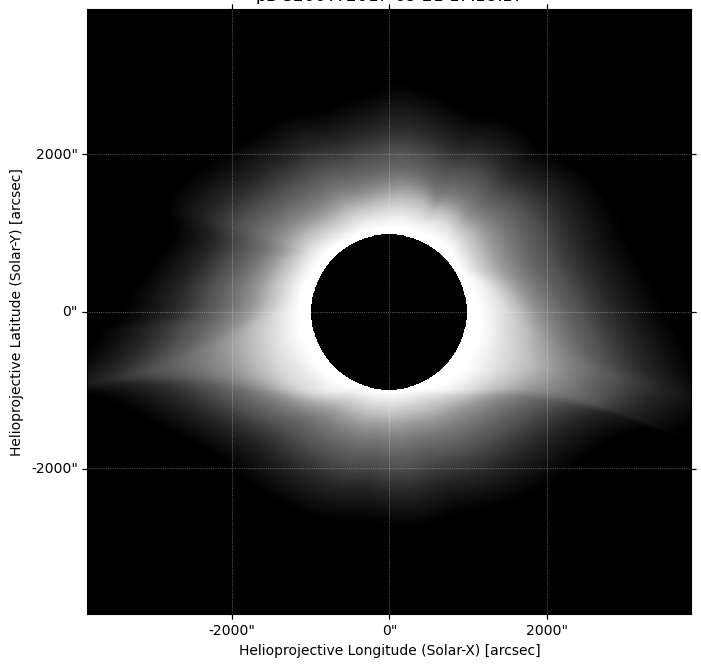

In [5]:
# Plot the image using log scaling, set the center (zeros) to be black
psimap.plot_settings['norm'] = matplotlib.colors.LogNorm(1e-10, 1e-7)
psimap.plot_settings['cmap'] = plt.get_cmap('Greys_r')
psimap.plot_settings['cmap'].set_bad('k')

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
psimap.plot()
plt.show()

In [4]:
cormap = sunpy.map.Map('/Users/crura/Desktop/Research/eclipse/Eclipse_Images_New/20170821/processed/20170821_144500_0P4c1A.fts')

cormap2 = sunpy.map.Map('/Users/crura/Desktop/Research/eclipse/Eclipse_Images_New/20170821/20170821_144500_s4c1A.fts')



corfilepath = '/Users/crura/Desktop/Research/eclipse/Eclipse_Images_New/20170821/processed/20170821_144500_0P4c1A.fts'
cordata, corheader = sunpy.io.fits.read(corfilepath)[0] 
corheader['cunit1'] = 'arcsec' 
corheader['cunit2'] = 'arcsec' 



corfilepath2 = '/Users/crura/Desktop/Research/eclipse/Eclipse_Images_New/20170821/20170821_134500_s4c1A.fts'
cordata2, corheader2 = sunpy.io.fits.read(corfilepath2)[0] 
corheader2['cunit1'] = 'arcsec' 
corheader2['cunit2'] = 'arcsec' 

corbackfilepath = '/Users/crura/Desktop/Research/FITS Images New/downloaded fits/Background images/Monthly min/a/monthly_min/201708/mc1A_p000_170825.fts'
corbackdata, corbackheader = sunpy.io.fits.read(corbackfilepath)[0] 
corbackheader['cunit1'] = 'arcsec' 
corbackheader['cunit2'] = 'arcsec'

corbackmap = sunpy.map.Map(corbackdata,corbackheader)


correpfilepath = '/Users/crura/Desktop/Research/eclipse/Eclipse_Images_New/20170821/Rep_Images/20170821_rep_med.fts'
correpdata, correpheader = sunpy.io.fits.read(correpfilepath)[0] 
correpheader['cunit1'] = 'arcsec' 
correpheader['cunit2'] = 'arcsec'

correpmap = sunpy.map.Map(correpdata,correpheader)

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


<sunpy.map.sources.stereo.CORMap object at 0x7fa879c94430>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2017-08-21 14:45:00
Exposure Time:		 -1.000000 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [15.00860023 15.00860023] arcsec / pix
Reference Pixel:	 [254.73  254.473] pix
Reference Coord:	 [ 39.59136963 -93.63426209] arcsec                   
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
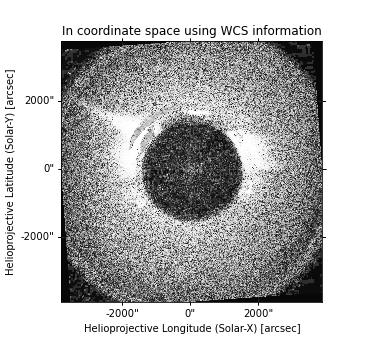
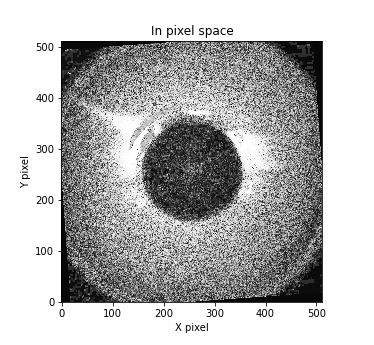
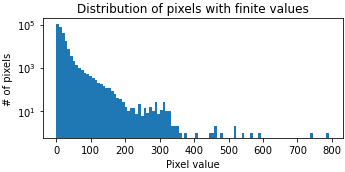

In [8]:
cormap

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


<sunpy.map.sources.stereo.CORMap object at 0x7fa869450460>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2017-08-21 14:45:00
Exposure Time:		 0.701808 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [15.00860023 15.00860023] arcsec / pix
Reference Pixel:	 [254.73  254.473] pix
Reference Coord:	 [ 39.59136963 -93.63426209] arcsec                   
array([[688, 688, 688, ..., 674, 674, 674],
       [688, 688, 688, ..., 674, 674, 674],
       [688, 688, 688, ..., 674, 674, 674],
       ...,
       [686, 686, 686, ..., 674, 674, 674],
       [686, 686, 686, ..., 674, 674, 674],
       [686, 686, 686, ..., 674, 674, 674]], dtype=uint16)
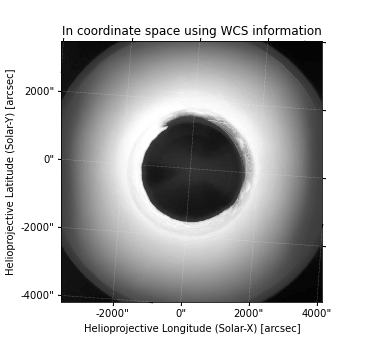
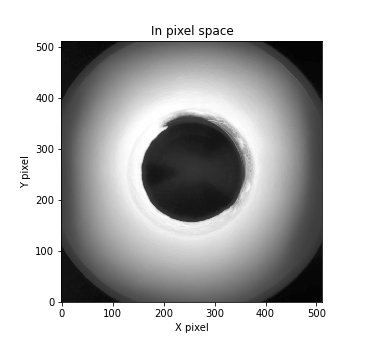
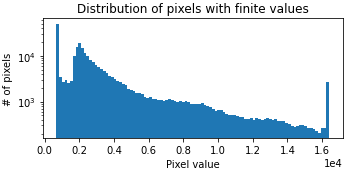

In [93]:
cormap2

In [17]:
filepath = '/Users/crura/Desktop/Research/FITS Images New/downloaded fits/Background images/Monthly min/a/monthly_min/201708/mc1A_p120_170825.fts'
# note header is header of background image
data, header = sunpy.io.fits.read(filepath)[0] 
header['cunit1'] = 'arcsec' 
header['cunit2'] = 'arcsec' 
backmap = sunpy.map.Map(data, header) 

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]


<sunpy.map.sources.stereo.CORMap object at 0x7fa84a3fd6d0>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2017-08-25 12:23:23
Exposure Time:		 1.000000 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [1. 1.] arcsec / pix
Reference Pixel:	 [255.5 255.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[130.08777  , 130.08777  , 130.08777  , ...,  40.609093 ,
         84.52716  ,  40.21735  ],
       [130.08777  , 130.08777  , 130.08777  , ...,  84.5484   ,
         84.596115 ,  84.596115 ],
       [130.08777  , 130.08777  , 130.08777  , ...,  84.5484   ,
         84.596115 ,  84.596115 ],
       ...,
       [493.8434   , 493.8434   , 493.8434   , ...,  -6.3652797,
         -6.3652797,  -6.3652797],
       [493.8434   , 493.8434   , 493.8434   , ...,  -6.3652797,
         -6.3652797,  -6.3652797],
       [493.8434   , 493.8434   , 493.8434   , ...,  -6.3652797,
         -6.3652797,  -6.3652797]], dtype=float32)
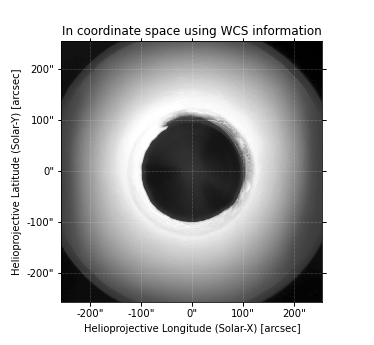
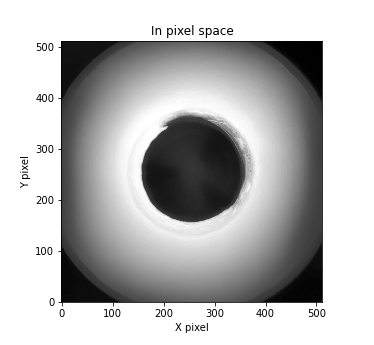
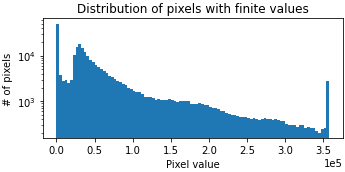

In [18]:
backmap

In [21]:
header

FileHeader([('SIMPLE', True),
            ('BITPIX', -32),
            ('NAXIS', 2),
            ('NAXIS1', 512),
            ('NAXIS2', 512),
            ('DATE', '2017-09-27'),
            ('FILENAME', 'mc1A_p120_170825.fts'),
            ('TELESCOP', 'STEREO'),
            ('OBSRVTRY', 'STEREO_A'),
            ('INSTRUME', 'SECCHI'),
            ('DETECTOR', 'COR1'),
            ('FILTER', ''),
            ('POLAR', 120.0),
            ('P1COL', 51),
            ('P1ROW', 1),
            ('P2COL', 2098),
            ('P2ROW', 2048),
            ('SUMROW', 1),
            ('SUMCOL', 1),
            ('SUMMED', 3.0),
            ('IPSUM', 3.0),
            ('CCDSUM', 1.0),
            ('OFFSETCR', 10755.9555556),
            ('LEBXSUM', 1),
            ('LEBYSUM', 1),
            ('DATE-OBS', '2017-08-25T12:23:23.422'),
            ('TIME-OBS', '12:23:23.422'),
            ('DATE-AVG', '2017-08-25T12:23:23.422'),
            ('EXPTIME', 1.0),
            ('EXPCMD', 0.70144),
          

In [18]:
filepathsim = '/Users/crura/Desktop/Research/PredictiveScience/fits_ec2017_wl_raw_rotating/pb_images'
child = filepathsim+'/psi_final_pb_raw_090.fits'
# note header is header of background image
cormap = sunpy.map.Map('/Users/crura/Desktop/Research/eclipse/Eclipse_Images_New/20170821/processed/20170821_144500_0P4c1A.fts')
for i in range(1,10):
    child = filepathsim+'/psi_final_pb_raw_00{}.fits'.format(i)
    simdata, simheader = sunpy.io.fits.read(child)[0] 
    simheader['cunit1'] = 'arcsec' 
    simheader['cunit2'] = 'arcsec' 
    simmap = sunpy.map.Map(simdata, simheader) 
    print(simmap.fits_header['CRLN_OBS'], simmap.fits_header['CRLT_OBS'],i)
    
for i in range(10,100):  
    child = filepathsim+'/psi_final_pb_raw_0{}.fits'.format(i)
    simdata, simheader = sunpy.io.fits.read(child)[0] 
    simheader['cunit1'] = 'arcsec' 
    simheader['cunit2'] = 'arcsec' 
    simmap = sunpy.map.Map(simdata, simheader) 
    print(simmap.fits_header['CRLN_OBS'], simmap.fits_header['CRLT_OBS'],i)
    
    
    
    
    
for i in range(1,10):
    child = filepathsim+'/psi_final_pb_raw_10{}.fits'.format(i)
    simdata, simheader = sunpy.io.fits.read(child)[0] 
    simheader['cunit1'] = 'arcsec' 
    simheader['cunit2'] = 'arcsec' 
    simmap = sunpy.map.Map(simdata, simheader) 
    print(simmap.fits_header['CRLN_OBS'], simmap.fits_header['CRLT_OBS'],i)
    
for i in range(10,100):  
    child = filepathsim+'/psi_final_pb_raw_1{}.fits'.format(i)
    simdata, simheader = sunpy.io.fits.read(child)[0] 
    simheader['cunit1'] = 'arcsec' 
    simheader['cunit2'] = 'arcsec' 
    simmap = sunpy.map.Map(simdata, simheader) 
    print(simmap.fits_header['CRLN_OBS'], simmap.fits_header['CRLT_OBS'],i)
    
    
    

290.702 6.92535 1
288.202 6.92535 2
285.702 6.92535 3
283.202 6.92535 4
280.702 6.92535 5
278.202 6.92535 6
275.702 6.92535 7
273.202 6.92535 8
270.702 6.92535 9
268.202 6.92535 10
265.702 6.92535 11
263.202 6.92535 12
260.702 6.92535 13
258.202 6.92535 14
255.702 6.92535 15
253.202 6.92535 16
250.702 6.92535 17
248.202 6.92535 18
245.702 6.92535 19
243.202 6.92535 20
240.702 6.92535 21
238.202 6.92535 22
235.702 6.92535 23
233.202 6.92535 24
230.702 6.92535 25
228.202 6.92535 26
225.702 6.92535 27
223.202 6.92535 28
220.702 6.92535 29
218.202 6.92535 30
215.702 6.92535 31
213.202 6.92535 32
210.702 6.92535 33
208.202 6.92535 34
205.702 6.92535 35
203.202 6.92535 36
200.702 6.92535 37
198.202 6.92535 38
195.702 6.92535 39
193.202 6.92535 40
190.702 6.92535 41
188.202 6.92535 42
185.702 6.92535 43
183.202 6.92535 44
180.702 6.92535 45
178.202 6.92535 46
175.702 6.92535 47
173.202 6.92535 48
170.702 6.92535 49
168.202 6.92535 50
165.702 6.92535 51
163.202 6.92535 52
160.702 6.92535 53
15

FileNotFoundError: [Errno 2] No such file or directory: '/Users/crura/Desktop/Research/PredictiveScience/fits_ec2017_wl_raw_rotating/pb_images/psi_final_pb_raw_145.fits'

In [38]:
simmap.fits_header['CRLN_OBS'], simmap.fits_header['CRLT_OBS']

(270.702, 6.92535)

In [41]:
cormap.fits_header['CRLN_OBS'], cormap.fits_header['CRLT_OBS']

(162.668459554, -6.10478401736)

In [43]:
cormap2.fits_header

SIMPLE  =                    T / Written by IDL:  Thu Aug 24 09:05:07 2017      
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  512                                                  
NAXIS2  =                  512                                                  
DATE-OBS= '2017-08-21T13:45:00.006'                                             
FILEORIG= 'H821030E.402'                                                        
SEB_PROG= 'SERIES  '                                                            
SYNC    =                    F                                                  
SPWX    =                    F                                                  
EXPCMD  =              0.70144                                                  
EXPTIME =              0.70184 / from MEB                                       
DSTART1 =                   

In [21]:
filepath = '/Users/crura/Desktop/Research/PredictiveScience/fits_ec2017_wl_raw_rotating/pb_images'
matchfilepath = filepath+'/psi_final_pb_raw_052.fits'
matchdata, matchheader = sunpy.io.fits.read(matchfilepath)[0] 
matchheader['cunit1'] = 'arcsec' 
matchheader['cunit2'] = 'arcsec' 
matchmap = sunpy.map.Map(matchdata, matchheader) 


# Corresponding Simulated pB Image taken from same Carrington Longitude as COR-1

<sunpy.map.mapbase.GenericMap object at 0x7fa8496b8cd0>
SunPy Map
---------
Observatory:		 PSI-MAS Forward Model
Instrument:		 Ground
Detector:		 pB
Measurement:		 5200.0 Angstrom
Wavelength:		 5200.0 Angstrom
Observation Date:	 2017-08-21 17:18:17
Exposure Time:		 1.000000 s
Dimension:		 [1200. 1200.] pix
Coordinate System:	 helioprojective
Scale:			 [6.40220593 6.40220593] arcsec / pix
Reference Pixel:	 [599.5 599.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[8.5791617e-12, 8.5940604e-12, 8.6091394e-12, ..., 7.6472188e-12,
        7.6282444e-12, 7.6093342e-12],
       [8.6179978e-12, 8.6328340e-12, 8.6478489e-12, ..., 7.6762702e-12,
        7.6572039e-12, 7.6382017e-12],
       [8.6572242e-12, 8.6719989e-12, 8.6869505e-12, ..., 7.7054682e-12,
        7.6863091e-12, 7.6672141e-12],
       ...,
       [8.0867049e-12, 8.1050409e-12, 8.1234438e-12, ..., 7.1282689e-12,
        7.1114503e-12, 7.0946734e-12],
       [8.0547366e-12, 8.0729815e-12, 8.0912915e-12, ..., 7.1001711e-12,
        7.0834532e-12, 7.0667760e-12],
       [8.0229365e-12, 8.0410895e-12, 8.0593084e-12, ..., 7.0722031e-12,
        7.0555848e-12, 7.0390070e-12]], dtype=float32)
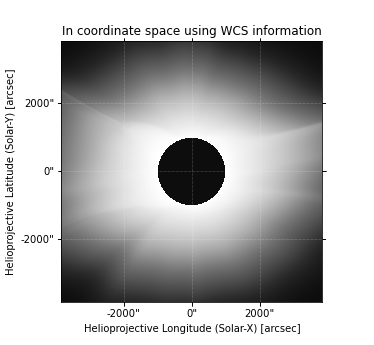
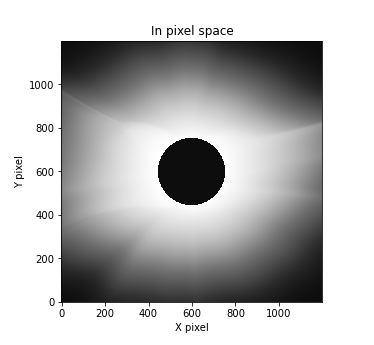
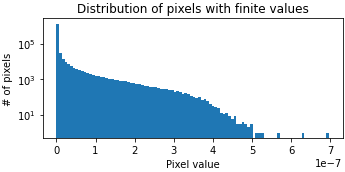

In [45]:
matchmap

# COR-1 Corresponding pB Image

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


<sunpy.map.sources.stereo.CORMap object at 0x7fa818b83dc0>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2017-08-21 14:45:00
Exposure Time:		 -1.000000 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [15.00860023 15.00860023] arcsec / pix
Reference Pixel:	 [254.73  254.473] pix
Reference Coord:	 [ 39.59136963 -93.63426209] arcsec                   
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
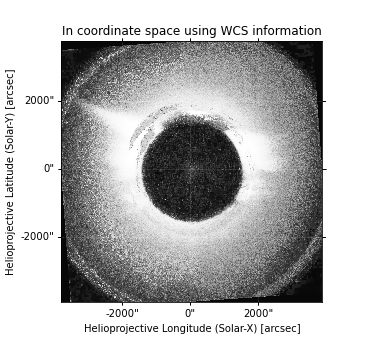
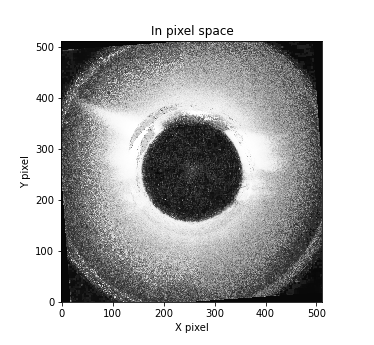
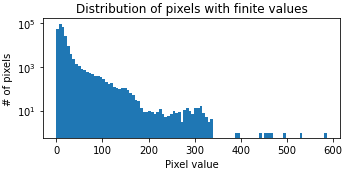

In [109]:
correpmap

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


<sunpy.map.sources.stereo.CORMap object at 0x7fa88a079b20>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2017-08-21 14:45:00
Exposure Time:		 -1.000000 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [15.00860023 15.00860023] arcsec / pix
Reference Pixel:	 [254.73  254.473] pix
Reference Coord:	 [ 39.59136963 -93.63426209] arcsec                   
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
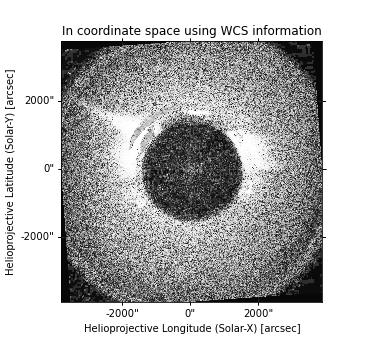
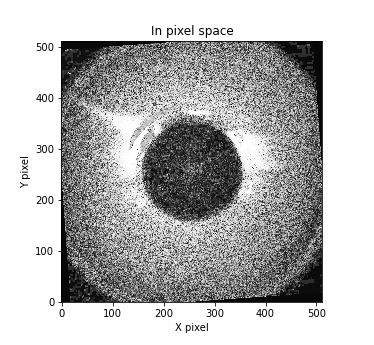
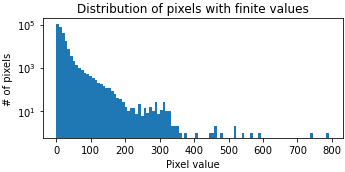

In [55]:
cormap

<ipython-input-48-c671b4665eb6>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greys_r"))
  matchmap.plot_settings['cmap'].set_bad('k')


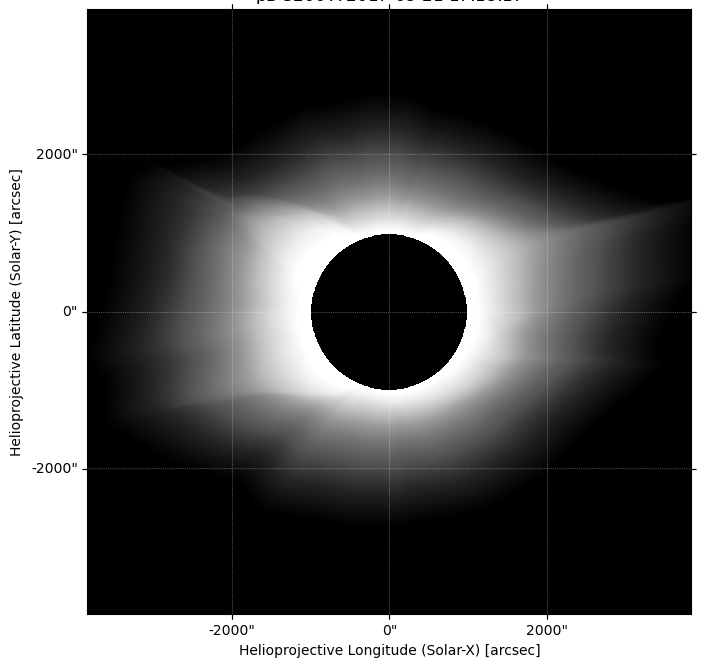

In [48]:
# Plot the image using log scaling, set the center (zeros) to be black
matchmap.plot_settings['norm'] = matplotlib.colors.LogNorm(1e-10, 1e-7)
matchmap.plot_settings['cmap'] = plt.get_cmap('Greys_r')
matchmap.plot_settings['cmap'].set_bad('k')

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
matchmap.plot()
plt.show()

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


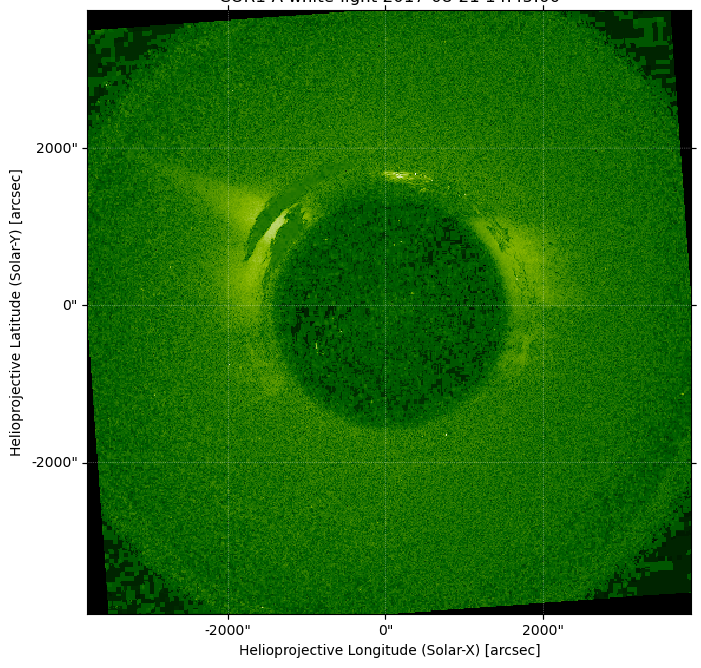

In [57]:
# Plot the image using log scaling, set the center (zeros) to be black
# cormap.plot_settings['norm'] = matplotlib.colors.LogNorm(1e-10, 1e-7)
# cormap.plot_settings['cmap'] = plt.get_cmap('Greys_r')
# cormap.plot_settings['cmap'].set_bad('k')

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
cormap.plot()
plt.show()

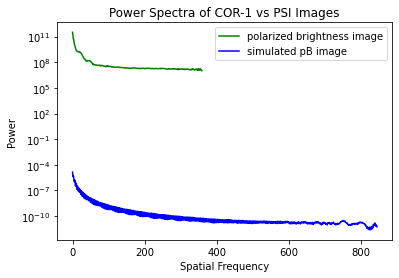

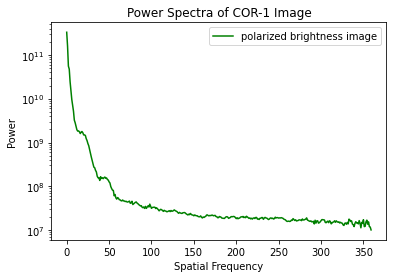

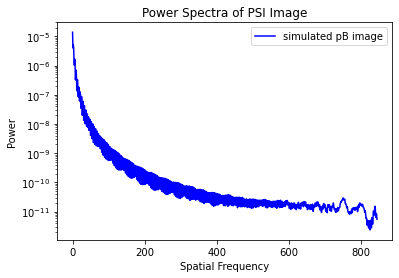

In [89]:
# matchdata
# cordata
F1cor = fft2(cordata)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2cor = fftshift( F1cor )

# Calculate a 2D power spectrum
psd2Dcor = np.abs( F2cor )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1Dcor = azimuthalAverage(psd2Dcor)


F1match = fft2(matchdata)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2match = fftshift( F1match )

# Calculate a 2D power spectrum
psd2Dmatch = np.abs( F2match )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1Dmatch = azimuthalAverage(psd2Dmatch)


plt.clf()
plt.semilogy( psd1Dcor ,color='green',label='polarized brightness image')
plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()


plt.semilogy( psd1Dcor ,color='green',label='polarized brightness image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 Image')
plt.legend()
plt.show()


plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of PSI Image')
plt.legend()
plt.show()

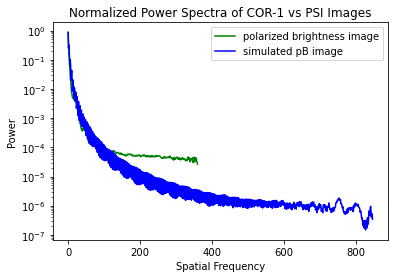

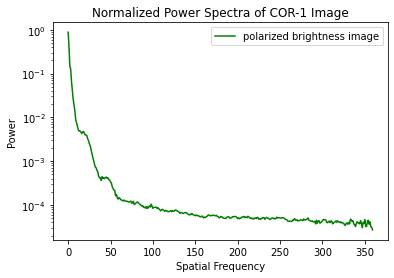

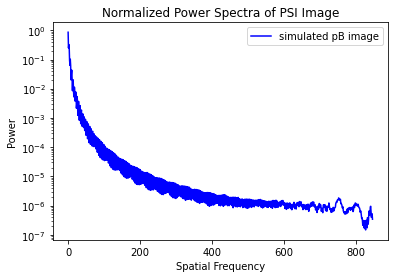

In [77]:
from sklearn import preprocessing

normalized_cor = preprocessing.normalize([psd1Dcor])
normalized_match = preprocessing.normalize([psd1Dmatch])

plt.clf()
plt.semilogy( normalized_cor[0] ,color='green',label='polarized brightness image')
plt.semilogy( normalized_match[0]  ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Normalized Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()

plt.clf()
plt.semilogy( normalized_cor[0] ,color='green',label='polarized brightness image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Normalized Power Spectra of COR-1 Image')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()

plt.semilogy( normalized_match[0]  ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Normalized Power Spectra of PSI Image')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()


In [73]:
psd1Dcor.shape,cordata.shape,psd1Dmatch.shape

((360,), (512, 512), (846,))

In [72]:
normalized_cor.shape, normalized_match.shape

((1, 360), (1, 846))

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


<sunpy.map.sources.stereo.CORMap object at 0x7fa869450460>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2017-08-21 14:45:00
Exposure Time:		 0.701808 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [15.00860023 15.00860023] arcsec / pix
Reference Pixel:	 [254.73  254.473] pix
Reference Coord:	 [ 39.59136963 -93.63426209] arcsec                   
array([[688, 688, 688, ..., 674, 674, 674],
       [688, 688, 688, ..., 674, 674, 674],
       [688, 688, 688, ..., 674, 674, 674],
       ...,
       [686, 686, 686, ..., 674, 674, 674],
       [686, 686, 686, ..., 674, 674, 674],
       [686, 686, 686, ..., 674, 674, 674]], dtype=uint16)
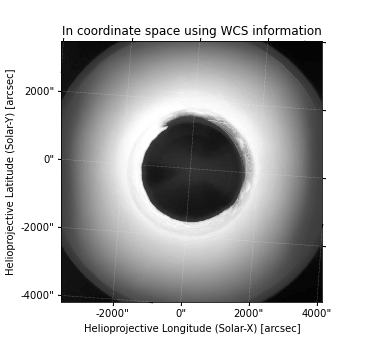
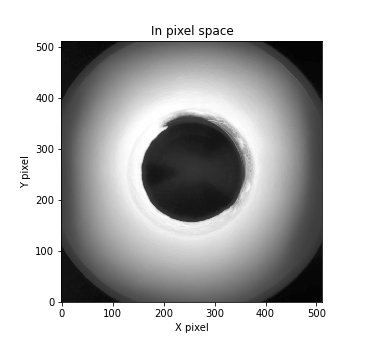
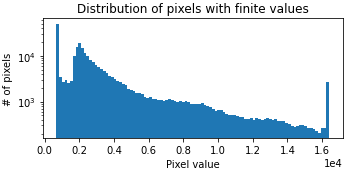

In [94]:
cormap2

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


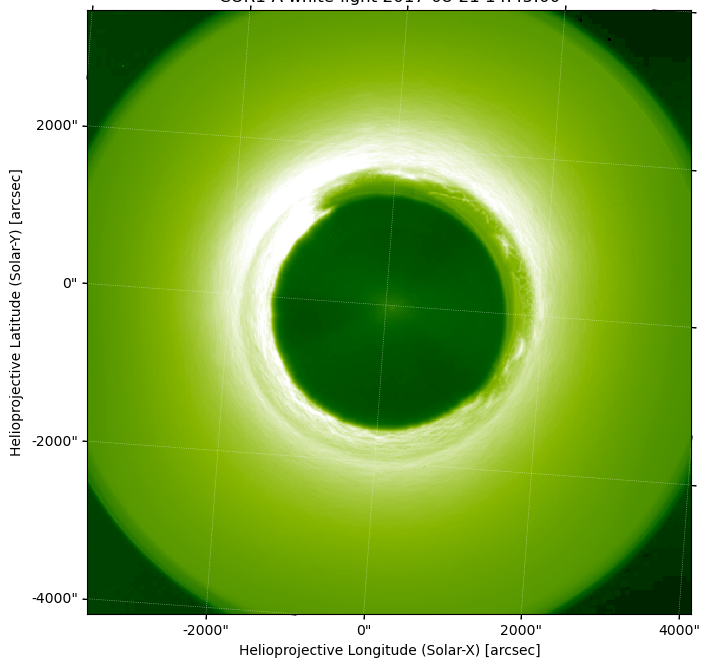

In [95]:
# Plot the image using log scaling, set the center (zeros) to be black
# matchmap.plot_settings['norm'] = matplotlib.colors.LogNorm(1e-10, 1e-7)
# matchmap.plot_settings['cmap'] = plt.get_cmap('Greys_r')
# matchmap.plot_settings['cmap'].set_bad('k')

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
cormap2.plot()
plt.show()

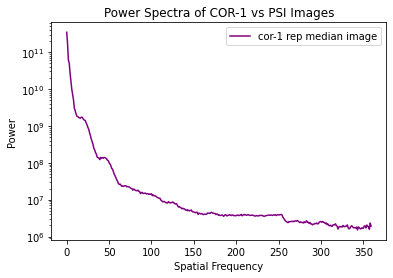

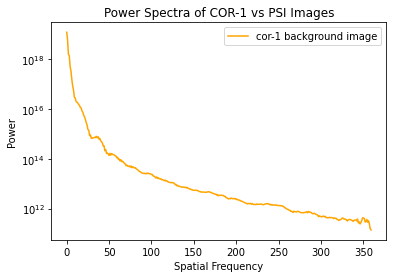

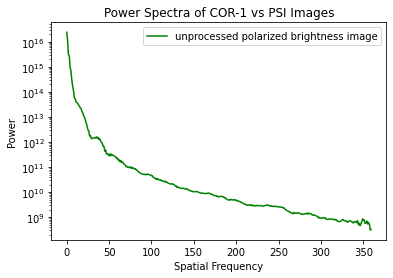

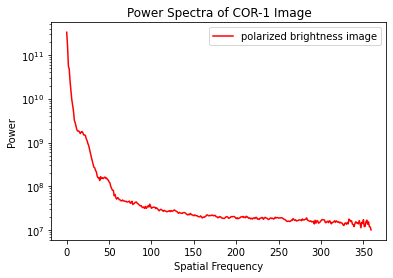

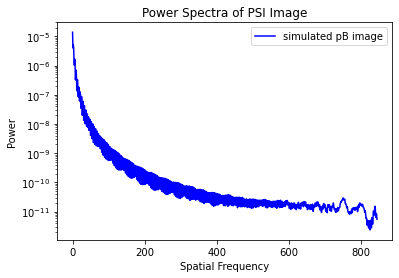

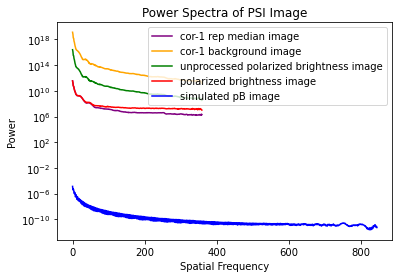

In [108]:
F1cor2 = fft2(cordata2)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2cor2 = fftshift( F1cor2 )

# Calculate a 2D power spectrum
psd2Dcor2 = np.abs( F2cor2 )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1Dcor2 = azimuthalAverage(psd2Dcor2)



F1corback = fft2(corbackdata)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2corback = fftshift( F1corback )

# Calculate a 2D power spectrum
psd2Dcorback = np.abs( F2corback )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1Dcorback = azimuthalAverage(psd2Dcorback)




F1correp = fft2(correpdata)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2correp = fftshift( F1correp )

# Calculate a 2D power spectrum
psd2Dcorrep = np.abs( F2correp )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1Dcorrep = azimuthalAverage(psd2Dcorrep)


# F1match = fft2(matchdata)

# # Now shift the quadrants around so that low spatial frequencies are in
# # the center of the 2D fourier transformed image.
# F2match = fftshift( F1match )

# # Calculate a 2D power spectrum
# psd2Dmatch = np.abs( F2match )**2

# # Calculate the azimuthally averaged 1D power spectrum
# psd1Dmatch = azimuthalAverage(psd2Dmatch)



plt.clf()
plt.semilogy( psd1Dcorrep ,color='purple',label='cor-1 rep median image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()


plt.clf()
plt.semilogy( psd1Dcorback ,color='orange',label='cor-1 background image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()


plt.clf()
plt.semilogy( psd1Dcor2 ,color='green',label='unprocessed polarized brightness image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()


plt.semilogy( psd1Dcor ,color='red',label='polarized brightness image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 Image')
plt.legend()
plt.show()


plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of PSI Image')
plt.legend()
plt.show()




# plotting all together 



plt.clf()
plt.semilogy( psd1Dcorrep ,color='purple',label='cor-1 rep median image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


#plt.show()


#plt.clf()
plt.semilogy( psd1Dcorback ,color='orange',label='cor-1 background image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()


#plt.clf()
plt.semilogy( psd1Dcor2 ,color='green',label='unprocessed polarized brightness image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


#plt.show()


plt.semilogy( psd1Dcor ,color='red',label='polarized brightness image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 Image')
plt.legend()
#plt.show()


plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of PSI Image')
plt.legend()
plt.show()


keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]


<sunpy.map.sources.stereo.CORMap object at 0x7fa8714cf220>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2017-08-25 12:22:50
Exposure Time:		 1.000000 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [1. 1.] arcsec / pix
Reference Pixel:	 [255.5 255.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[357.38995, 357.39572, 357.39572, ...,  38.90158,  38.90158,
         38.90158],
       [357.39572, 357.38995, 357.39572, ...,  38.90158,  38.90158,
         38.90158],
       [357.38995, 357.38995, 357.39572, ...,  38.90158,  38.90158,
         38.90158],
       ...,
       [311.7592 , 311.7592 , 311.7592 , ...,  38.90158,  38.90158,
         38.90158],
       [311.7592 , 311.7592 , 311.7592 , ...,  38.90158,  38.90158,
         38.90158],
       [311.7592 , 311.7592 , 311.7592 , ...,  38.90158,  38.90158,
         38.90158]], dtype=float32)
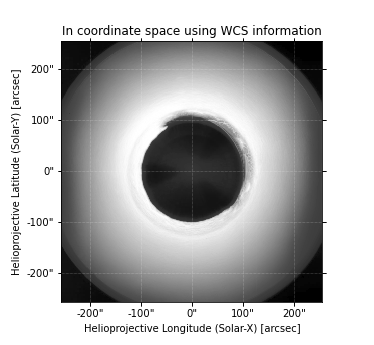
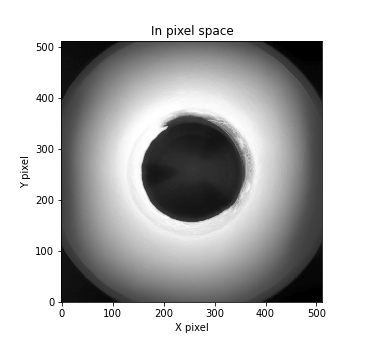
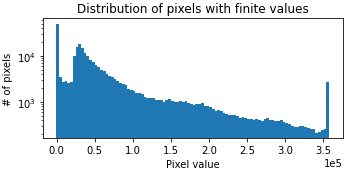

In [102]:
corbackmap

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


<sunpy.map.sources.stereo.CORMap object at 0x7fa818b83dc0>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2017-08-21 14:45:00
Exposure Time:		 -1.000000 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [15.00860023 15.00860023] arcsec / pix
Reference Pixel:	 [254.73  254.473] pix
Reference Coord:	 [ 39.59136963 -93.63426209] arcsec                   
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
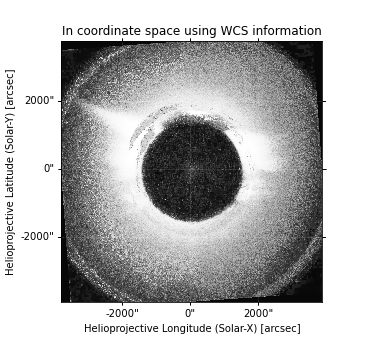
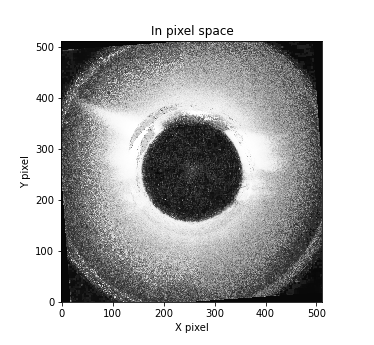
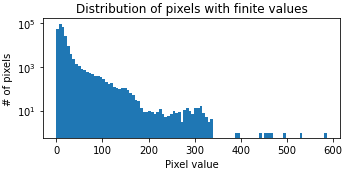

In [107]:
correpmap

In [110]:
corbackfilepath_combined = '/Users/crura/Desktop/Research/eclipse/Eclipse_Images_New/Combined_PB/170825pB.fts'
corbackdata_combined, corbackheader_combined = sunpy.io.fits.read(corbackfilepath_combined)[0] 
corbackheader_combined['cunit1'] = 'arcsec' 
corbackheader_combined['cunit2'] = 'arcsec'

corbackmap_combined = sunpy.map.Map(corbackdata,corbackheader)

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]


<sunpy.map.sources.stereo.CORMap object at 0x7fa87c577f70>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2017-08-25 12:22:50
Exposure Time:		 1.000000 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [1. 1.] arcsec / pix
Reference Pixel:	 [255.5 255.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[357.38995, 357.39572, 357.39572, ...,  38.90158,  38.90158,
         38.90158],
       [357.39572, 357.38995, 357.39572, ...,  38.90158,  38.90158,
         38.90158],
       [357.38995, 357.38995, 357.39572, ...,  38.90158,  38.90158,
         38.90158],
       ...,
       [311.7592 , 311.7592 , 311.7592 , ...,  38.90158,  38.90158,
         38.90158],
       [311.7592 , 311.7592 , 311.7592 , ...,  38.90158,  38.90158,
         38.90158],
       [311.7592 , 311.7592 , 311.7592 , ...,  38.90158,  38.90158,
         38.90158]], dtype=float32)
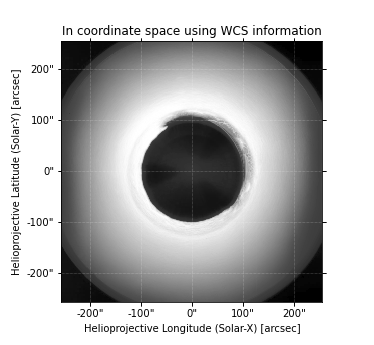
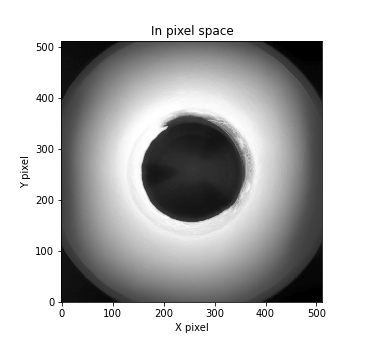
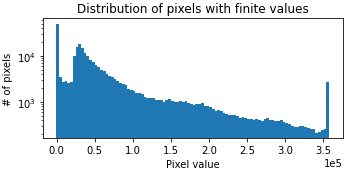

In [111]:
corbackmap_combined

In [112]:
corbackdata_combined == corbackdata

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [119]:
pathnew = '/Users/crura/Desktop/Research/eclipse/Eclipse_Images_New/Combined_PB/psi_final_pb_raw_090_copy.fits'
psi_data = psimap.data
data_subtract = psi_data - corbackdata_combined

# hdumean = fits.PrimaryHDU(data=imcombmean,header=head)
# #hdumean.writeto('/Users/Chris/Desktop/Goddard Research/FITS Images New/downloaded fits/Background images/All images/rep_avg.fts',overwrite=True)
# hdumean.writeto(pathnew,overwrite=True)

ValueError: operands could not be broadcast together with shapes (1200,1200) (512,512) 

<sunpy.map.mapbase.GenericMap object at 0x7fa84ac0a850>
SunPy Map
---------
Observatory:		 PSI-MAS Forward Model
Instrument:		 Ground
Detector:		 pB
Measurement:		 5200.0 Angstrom
Wavelength:		 5200.0 Angstrom
Observation Date:	 2017-08-21 17:18:17
Exposure Time:		 1.000000 s
Dimension:		 [1200. 1200.] pix
Coordinate System:	 helioprojective
Scale:			 [6.40220593 6.40220593] arcsec / pix
Reference Pixel:	 [599.5 599.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[1.0725494e-11, 1.0744518e-11, 1.0763545e-11, ..., 8.2728468e-12,
        8.2525800e-12, 8.2323853e-12],
       [1.0773750e-11, 1.0792937e-11, 1.0812125e-11, ..., 8.3039990e-12,
        8.2836394e-12, 8.2633535e-12],
       [1.0822209e-11, 1.0841564e-11, 1.0860917e-11, ..., 8.3353159e-12,
        8.3148644e-12, 8.2944875e-12],
       ...,
       [6.4997426e-12, 6.5181471e-12, 6.5366293e-12, ..., 8.4710051e-12,
        8.4561585e-12, 8.4413058e-12],
       [6.4770298e-12, 6.4953611e-12, 6.5137700e-12, ..., 8.4352343e-12,
        8.4203547e-12, 8.4054699e-12],
       [6.4544316e-12, 6.4726900e-12, 6.4910252e-12, ..., 8.3996950e-12,
        8.3847825e-12, 8.3698656e-12]], dtype=float32)
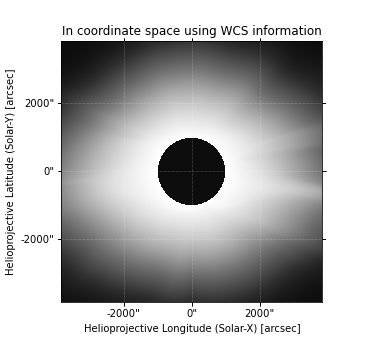
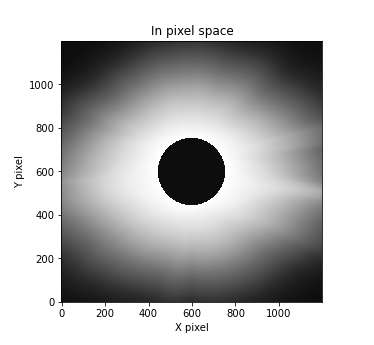
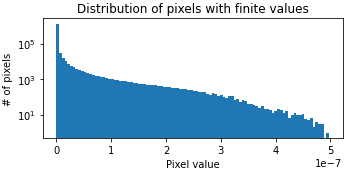

In [118]:
psimap

In [122]:
corbackdata_combined.resize([1200,1200])

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [14]:
matchfilepath, correpfilepath

('/Users/crura/Desktop/Research/PredictiveScience/fits_ec2017_wl_raw_rotating/pb_images/psi_final_pb_raw_052.fits',
 '/Users/crura/Desktop/Research/eclipse/Eclipse_Images_New/20170821/Rep_Images/20170821_rep_med.fts')

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


<sunpy.map.sources.stereo.CORMap object at 0x7fc049a4c670>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2017-08-21 14:45:00
Exposure Time:		 -1.000000 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [15.00860023 15.00860023] arcsec / pix
Reference Pixel:	 [254.73  254.473] pix
Reference Coord:	 [ 39.59136963 -93.63426209] arcsec                   
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
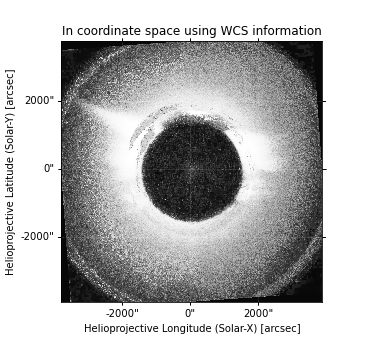
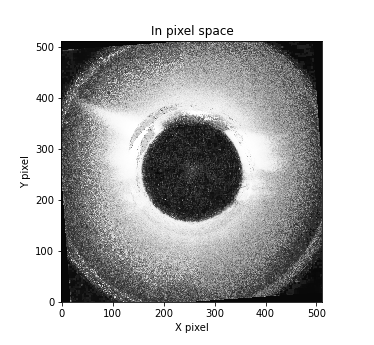
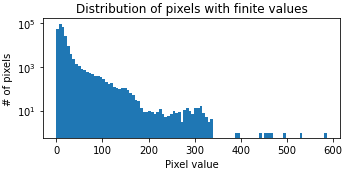

In [7]:
correpmap

<sunpy.map.mapbase.GenericMap object at 0x7fc048efc9d0>
SunPy Map
---------
Observatory:		 PSI-MAS Forward Model
Instrument:		 Ground
Detector:		 pB
Measurement:		 5200.0 Angstrom
Wavelength:		 5200.0 Angstrom
Observation Date:	 2017-08-21 17:18:17
Exposure Time:		 1.000000 s
Dimension:		 [1200. 1200.] pix
Coordinate System:	 helioprojective
Scale:			 [6.40220593 6.40220593] arcsec / pix
Reference Pixel:	 [599.5 599.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[8.5791617e-12, 8.5940604e-12, 8.6091394e-12, ..., 7.6472188e-12,
        7.6282444e-12, 7.6093342e-12],
       [8.6179978e-12, 8.6328340e-12, 8.6478489e-12, ..., 7.6762702e-12,
        7.6572039e-12, 7.6382017e-12],
       [8.6572242e-12, 8.6719989e-12, 8.6869505e-12, ..., 7.7054682e-12,
        7.6863091e-12, 7.6672141e-12],
       ...,
       [8.0867049e-12, 8.1050409e-12, 8.1234438e-12, ..., 7.1282689e-12,
        7.1114503e-12, 7.0946734e-12],
       [8.0547366e-12, 8.0729815e-12, 8.0912915e-12, ..., 7.1001711e-12,
        7.0834532e-12, 7.0667760e-12],
       [8.0229365e-12, 8.0410895e-12, 8.0593084e-12, ..., 7.0722031e-12,
        7.0555848e-12, 7.0390070e-12]], dtype=float32)
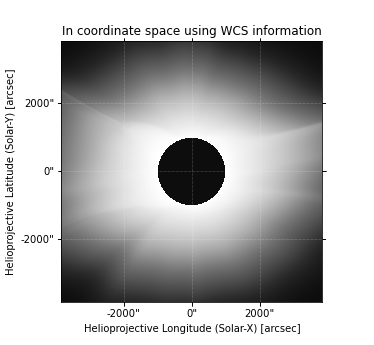
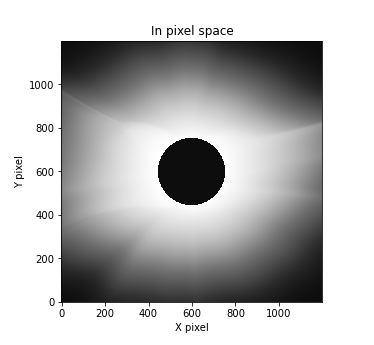
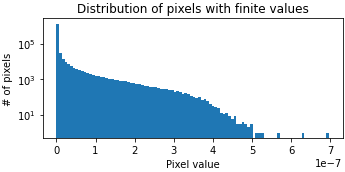

In [8]:
matchmap

In [9]:
correpheader

FileHeader([('SIMPLE', True),
            ('BITPIX', -32),
            ('NAXIS', 2),
            ('NAXIS1', 512),
            ('NAXIS2', 512),
            ('DATE-OBS', '2017-08-21T14:45:00.004'),
            ('TIME_OBS', ''),
            ('FILEORIG', 'H821037A.402'),
            ('SEB_PROG', 'SERIES'),
            ('SYNC', False),
            ('SPWX', False),
            ('EXPCMD', 0.70144),
            ('EXPTIME', -1.0),
            ('DSTART1', 1),
            ('DSTOP1', 512),
            ('DSTART2', 1),
            ('DSTOP2', 512),
            ('P1COL', 51),
            ('P2COL', 2098),
            ('P1ROW', 1),
            ('P2ROW', 2048),
            ('R1COL', 129),
            ('R2COL', 2176),
            ('R1ROW', 51),
            ('R2ROW', 2098),
            ('RECTIFY', True),
            ('RECTROTA', 1),
            ('LEDCOLOR', 'NONE'),
            ('LEDPULSE', 0),
            ('OFFSET', 600),
            ('BIASMEAN', 672.276),
            ('BIASSDEV', 0.02),
            ('GAI

In [10]:
matchheader

FileHeader([('SIMPLE', True),
            ('BITPIX', -32),
            ('NAXIS', 2),
            ('NAXIS1', 1200),
            ('NAXIS2', 1200),
            ('DATE_OBS', '2017-08-21T17:18:17.60'),
            ('T_REC', '2017-08-21T17:18:17.60'),
            ('T_OBS', '2017-08-21T17:18:17.60'),
            ('OBSRVTRY', 'PSI-MAS Forward Model'),
            ('INSTRUME', 'Ground'),
            ('TELESCOP', 'Ground'),
            ('DETECTOR', 'pB'),
            ('IMG_TYPE', 'model'),
            ('EXPTIME', 1.0),
            ('WAVELNTH', 5200.0),
            ('WAVEUNIT', 'angstrom'),
            ('BUNIT', 'BSUN'),
            ('CTYPE1', 'HPLN-TAN'),
            ('CUNIT1', 'arcsec'),
            ('CRVAL1', 0.0),
            ('CDELT1', 6.40220593161),
            ('CRPIX1', 600.5),
            ('CTYPE2', 'HPLT-TAN'),
            ('CUNIT2', 'arcsec'),
            ('CRVAL2', 0.0),
            ('CDELT2', 6.40220593161),
            ('CRPIX2', 600.5),
            ('CROTA2', -0.0),
            ('

In [12]:
matchheader['CRLN_OBS'], correpheader['CRLN_OBS']

(163.202, 162.668459554)

In [15]:



mlsofilepath = '/Users/crura/Desktop/Research/eclipse/Eclipse_Images_New/20170821.kcor_pbextavg.fits/20170821_171551_kcor_l1.5_extavg.fts'
mlsodata, mlsoheader = sunpy.io.fits.read(mlsofilepath)[0] 
mlsoheader['cunit1'] = 'arcsec' 
mlsoheader['cunit2'] = 'arcsec'

mlsomap = sunpy.map.Map(mlsodata,mlsoheader)



<sunpy.map.sources.mlso.KCorMap object at 0x7fc049dcea90>
SunPy Map
---------
Observatory:		 MLSO
Instrument:		 COSMO K-Coronagraph
Detector:		 KCor
Measurement:		 735.0 nm
Wavelength:		 735.0 nm
Observation Date:	 2017-08-21 17:15:51
Exposure Time:		 0.002500 s
Dimension:		 [1024. 1024.] pix
Coordinate System:	 helioprojective
Scale:			 [5.643 5.643] arcsec / pix
Reference Pixel:	 [511.5 511.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[-2.0000003e-08, -2.0000003e-08, -2.0000003e-08, ...,
        -2.0000003e-08, -2.0000003e-08, -2.0000003e-08],
       [-2.0000003e-08, -2.0000003e-08, -2.0000003e-08, ...,
        -2.0000003e-08, -2.0000003e-08, -2.0000003e-08],
       [-2.0000003e-08, -2.0000003e-08, -2.0000003e-08, ...,
        -2.0000003e-08, -2.0000003e-08, -2.0000003e-08],
       ...,
       [-2.0000003e-08, -2.0000003e-08, -2.0000003e-08, ...,
        -2.0000003e-08, -2.0000003e-08, -2.0000003e-08],
       [-2.0000003e-08, -2.0000003e-08, -2.0000003e-08, ...,
        -2.0000003e-08, -2.0000003e-08, -2.0000003e-08],
       [-2.0000003e-08, -2.0000003e-08, -2.0000003e-08, ...,
        -2.0000003e-08, -2.0000003e-08, -2.0000003e-08]], dtype=float32)
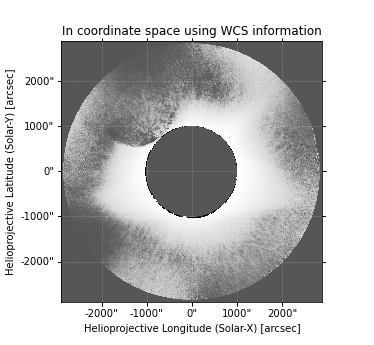
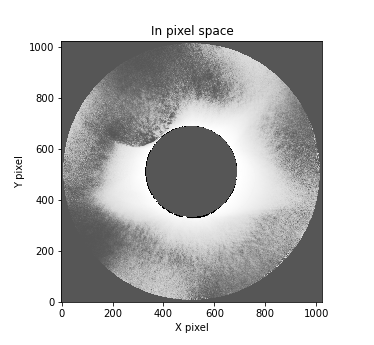
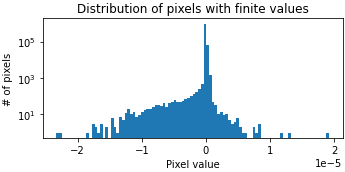

In [16]:
mlsomap

In [17]:
mlsoheader

FileHeader([('SIMPLE', True),
            ('BITPIX', -32),
            ('NAXIS', 2),
            ('NAXIS1', 1024),
            ('NAXIS2', 1024),
            ('EXTEND', False),
            ('DATE-OBS', '2017-08-21T17:15:51'),
            ('DATE-END', '2017-08-21T17:27:14'),
            ('TIMESYS', 'UTC'),
            ('DATE_HST', '2017-08-21T07:15:36'),
            ('LOCATION', 'MLSO'),
            ('ORIGIN', 'NCAR/HAO'),
            ('TELESCOP', 'COSMO K-Coronagraph'),
            ('INSTRUME', 'COSMO K-Coronagraph'),
            ('WAVELNTH', 735),
            ('WAVEFWHM', 30),
            ('OBJECT', 'Solar K-Corona'),
            ('DATATYPE', 'science'),
            ('OBSERVER', 'Waters'),
            ('AVGTIME0', '17:15:51 17:16:06 17:16:21 17:16:37'),
            ('AVGTIME1', '17:16:52 17:17:07 17:17:22 17:17:52'),
            ('AVGTIME2', '17:18:08 17:18:23 17:18:38 17:18:53'),
            ('AVGTIME3', '17:19:08 17:19:24 17:19:54 17:20:09'),
            ('AVGTIME4', '17:20:24 17:20:

In [6]:
filepath = '/Users/crura/Desktop/Research/PredictiveScience/fits_ec2017_wl_raw_rotating/pb_images'
mlsomatchfilepath = filepath+'/psi_final_pb_raw_001.fits'
mlsomatchdata, mlsomatchheader = sunpy.io.fits.read(mlsomatchfilepath)[0] 
mlsomatchheader['cunit1'] = 'arcsec' 
mlsomatchheader['cunit2'] = 'arcsec' 
mlsomatchmap = sunpy.map.Map(mlsomatchdata, mlsomatchheader) 


<sunpy.map.mapbase.GenericMap object at 0x7fc049cc91c0>
SunPy Map
---------
Observatory:		 PSI-MAS Forward Model
Instrument:		 Ground
Detector:		 pB
Measurement:		 5200.0 Angstrom
Wavelength:		 5200.0 Angstrom
Observation Date:	 2017-08-21 17:18:17
Exposure Time:		 1.000000 s
Dimension:		 [1200. 1200.] pix
Coordinate System:	 helioprojective
Scale:			 [6.40220593 6.40220593] arcsec / pix
Reference Pixel:	 [599.5 599.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[7.6389364e-12, 7.6593462e-12, 7.6798082e-12, ..., 9.9080232e-12,
        9.8869775e-12, 9.8659596e-12],
       [7.6656476e-12, 7.6861737e-12, 7.7067528e-12, ..., 9.9484804e-12,
        9.9272890e-12, 9.9061254e-12],
       [7.6924552e-12, 7.7130984e-12, 7.7337954e-12, ..., 9.9891172e-12,
        9.9677792e-12, 9.9464699e-12],
       ...,
       [8.4744399e-12, 8.4983704e-12, 8.5223105e-12, ..., 7.6107723e-12,
        7.5955067e-12, 7.5805057e-12],
       [8.4460607e-12, 8.4697995e-12, 8.4935453e-12, ..., 7.5776000e-12,
        7.5621887e-12, 7.5470455e-12],
       [8.4177075e-12, 8.4412538e-12, 8.4648052e-12, ..., 7.5448545e-12,
        7.5292975e-12, 7.5140102e-12]], dtype=float32)
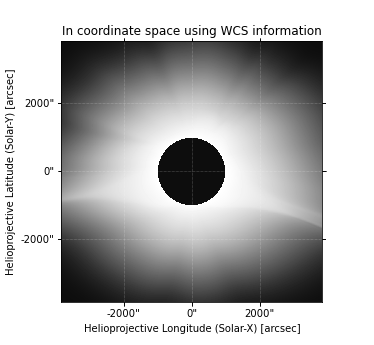
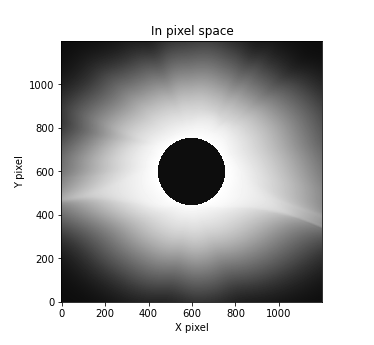
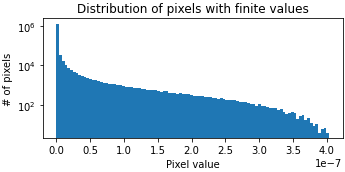

In [23]:
mlsomatchmap

In [24]:
mlsomatchheader

FileHeader([('SIMPLE', True),
            ('BITPIX', -32),
            ('NAXIS', 2),
            ('NAXIS1', 1200),
            ('NAXIS2', 1200),
            ('DATE_OBS', '2017-08-21T17:18:17.60'),
            ('T_REC', '2017-08-21T17:18:17.60'),
            ('T_OBS', '2017-08-21T17:18:17.60'),
            ('OBSRVTRY', 'PSI-MAS Forward Model'),
            ('INSTRUME', 'Ground'),
            ('TELESCOP', 'Ground'),
            ('DETECTOR', 'pB'),
            ('IMG_TYPE', 'model'),
            ('EXPTIME', 1.0),
            ('WAVELNTH', 5200.0),
            ('WAVEUNIT', 'angstrom'),
            ('BUNIT', 'BSUN'),
            ('CTYPE1', 'HPLN-TAN'),
            ('CUNIT1', 'arcsec'),
            ('CRVAL1', 0.0),
            ('CDELT1', 6.40220593161),
            ('CRPIX1', 600.5),
            ('CTYPE2', 'HPLT-TAN'),
            ('CUNIT2', 'arcsec'),
            ('CRVAL2', 0.0),
            ('CDELT2', 6.40220593161),
            ('CRPIX2', 600.5),
            ('CROTA2', -0.0),
            ('

In [25]:
mlsomatchheader['CRLN_OBS'], mlsoheader['CRLN_OBS']

(290.702, 290.724)

In [7]:
mlsomatchmap.header

AttributeError: 'GenericMap' object has no attribute 'header'